# PROJECT MEMBERS NAME

1. Shikshit Gupta
2. Venu Khare

Step 1: We will start from SPY in this project.

We compute the intraday volatility as Volatility = (High-Low)/Close

We then compute the daily volume change as Volume_delta = Volume_today - Volume_previousday 

We then compute the daily volatility change as Volatility_delta = Volatility_today  -Volatility_previouday Plot Volume_delta and Volatility_delta.

Use the sample code to generate graph

your_data_frame.plot(x='Volume_delta', y='Volatility_delta', style='.')

Based on your observations, can you find the mathematical equation(s) to describe the relationship between intraday volatility vs volume.

Hint: You can guess equation(s) and leave some coeffecients unknown, which you will find their values by numerical methods.

Then you can show how well your data fits your equation(s)
Use the last 5 years data of SPY to test your equation(s).


In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline 
plt.rcParams["figure.figsize"] = [20, 10]

In [3]:
# Loading Data

data = pd.read_csv('SPY.csv')
# Adding required columns of 'Volatility', 'Volume_delta', 'Volatility_delta'
data['Volatility'] = (data['High'] - data['Low'])/data['Close']
data['Volume_delta'] = data['Volume'] - data['Volume'].shift(1)
data['Volatility_delta'] = data['Volatility'] - data['Volatility'].shift(1)

# Handling null values
data = data.fillna(0)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
0,2022-10-24,375.890015,380.059998,373.109985,378.869995,372.998199,85436900,0.018344,0.0,0.000000
1,2022-10-25,378.790009,385.250000,378.670013,384.920013,378.954407,78846300,0.017094,-6590600.0,-0.001250
2,2022-10-26,381.619995,387.579987,381.350006,382.019989,376.099335,104087300,0.016308,25241000.0,-0.000786
3,2022-10-27,383.070007,385.000000,379.329987,379.980011,374.091003,81971800,0.014922,-22115500.0,-0.001386
4,2022-10-28,379.869995,389.519989,379.679993,389.019989,382.990845,100302000,0.025294,18330200.0,0.010372
...,...,...,...,...,...,...,...,...,...,...
245,2023-10-16,433.820007,437.140015,433.570007,436.040009,436.040009,75433200,0.008187,-19709900.0,-0.007039
246,2023-10-17,432.809998,438.140015,432.450012,436.019989,436.019989,75324700,0.013050,-108500.0,0.004863
247,2023-10-18,434.190002,435.179993,429.089996,430.209991,430.209991,93559800,0.014156,18235100.0,0.001106
248,2023-10-19,430.950012,432.820007,425.730011,426.429993,426.429993,121323000,0.016626,27763200.0,0.002471


<Axes: xlabel='Volume_delta'>

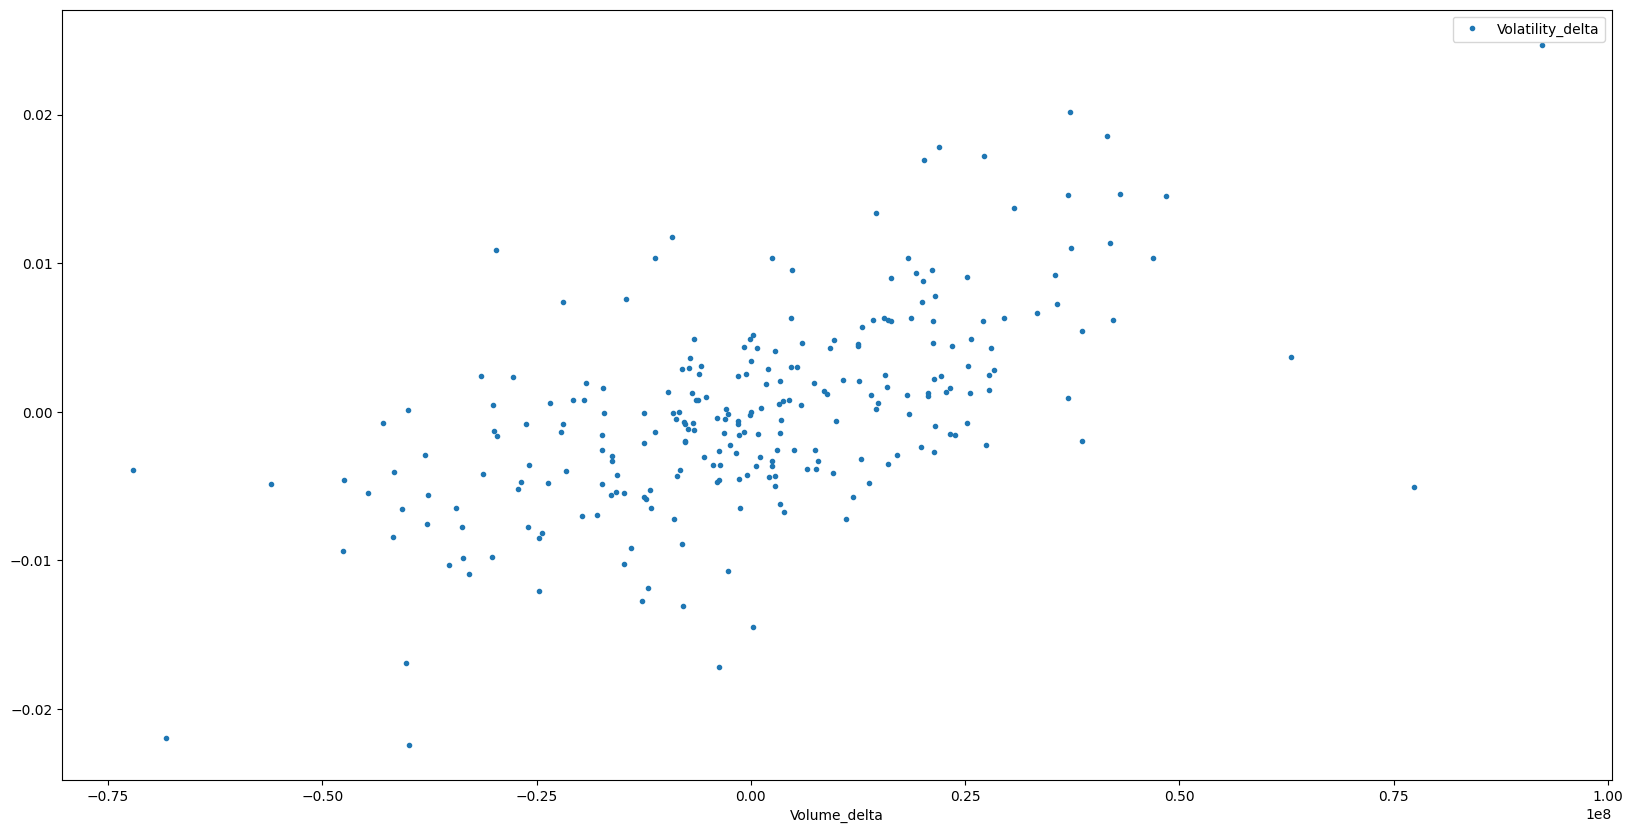

In [4]:
data.plot(x = 'Volume_delta', y= 'Volatility_delta', style='.')

## Based on your observations, can you find the mathematical equation(s) to describe the relationship between intraday volatility vs volume.

#### Hint: You can guess equation(s) and leave some coeffecients unknown, which you will find their values by numerical methods.

#### Then you can show how well your data fits your equation(s)

In [49]:
# Creating numpy variables to create the model

# Reshape the data
x = np.array(data['Volume_delta']).reshape(-1, 1)
y = np.array(data['Volatility_delta']).reshape(-1, 1)

# Calculate the means of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the differences between each data point and the mean
diff_x = x - mean_x
diff_y = y - mean_y

# Calculate the slope (a) and intercept (b)
slope = np.sum(diff_x * diff_y) / np.sum(diff_x * diff_x)
intercept = mean_y - (slope * mean_x)

# Equation for volatility delta
print(f"Equation: Volatility_delta = {slope:.12f} * Volume_delta + {intercept:.12f}")

Equation: Volatility_delta = 0.000000000176 * Volume_delta + -0.000048520097


R-squared: 0.369236
RMSE: 0.005338


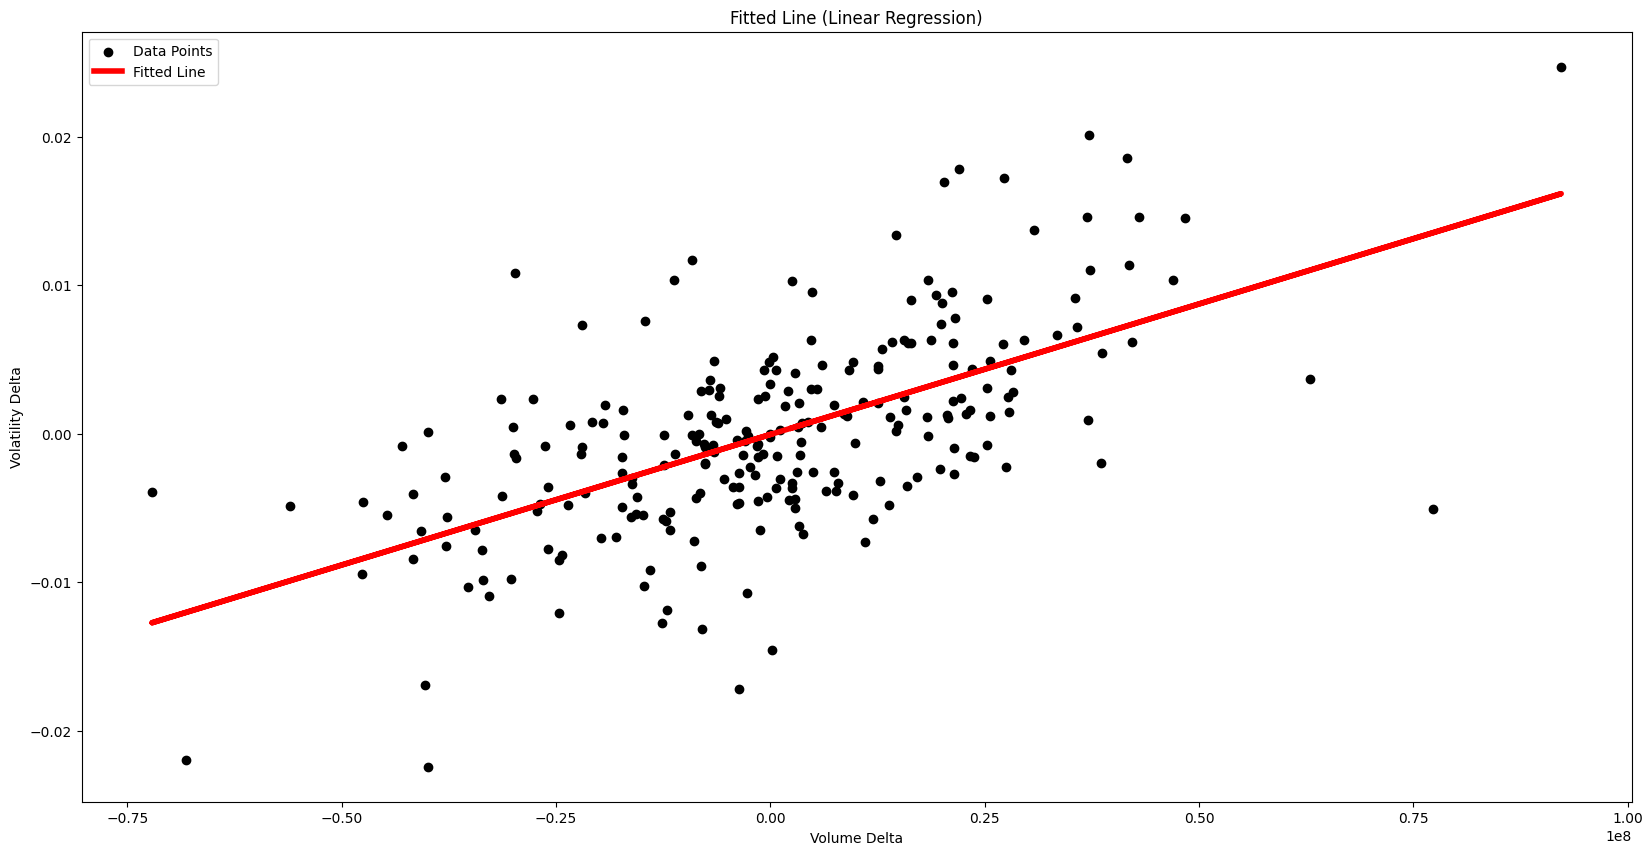

In [50]:
# SPY 1 year data graph plot

predicted_y = slope * x + intercept
# Calculate the residuals
residuals = y - predicted_y

# Calculate R-squared
total_variance = np.sum((y - np.mean(y))**2)
explained_variance = np.sum((predicted_y - np.mean(y))**2)
r_squared = explained_variance / total_variance

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))

print(f"R-squared: {r_squared:.6f}")
print(f"RMSE: {rmse:.6f}")

plt.scatter(x, y, label='Data Points', color='black')
plt.plot(x, predicted_y, label='Fitted Line', color='r', linewidth=4)
plt.title('Fitted Line (Linear Regression)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

### Use the last 5 years data of SPY to test your equation(s).

In [7]:
spy5 = pd.read_csv('SPY_5years.csv')
spy5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-29,268.799988,270.250000,259.850006,263.859985,242.732925,160749100
1,2018-10-30,263.670013,268.119995,263.119995,267.769989,246.329803,157116000
2,2018-10-31,270.649994,273.230011,270.119995,270.630005,248.960846,128296300
3,2018-11-01,271.600006,273.730011,270.380005,273.510010,251.610306,99495000
4,2018-11-02,274.750000,275.230011,269.589996,271.890015,250.119980,122634100


In [8]:
spy5['Volatility'] = (spy5['High'] - spy5['Low'])/spy5['Close']
spy5['Volume_delta'] = spy5['Volume'] - spy5['Volume'].shift(1)
spy5['Volatility_delta'] = spy5['Volatility'] - spy5['Volatility'].shift(1)
spy5 = spy5.fillna(0)

RMSE: 0.006190
R-squared: 0.340529


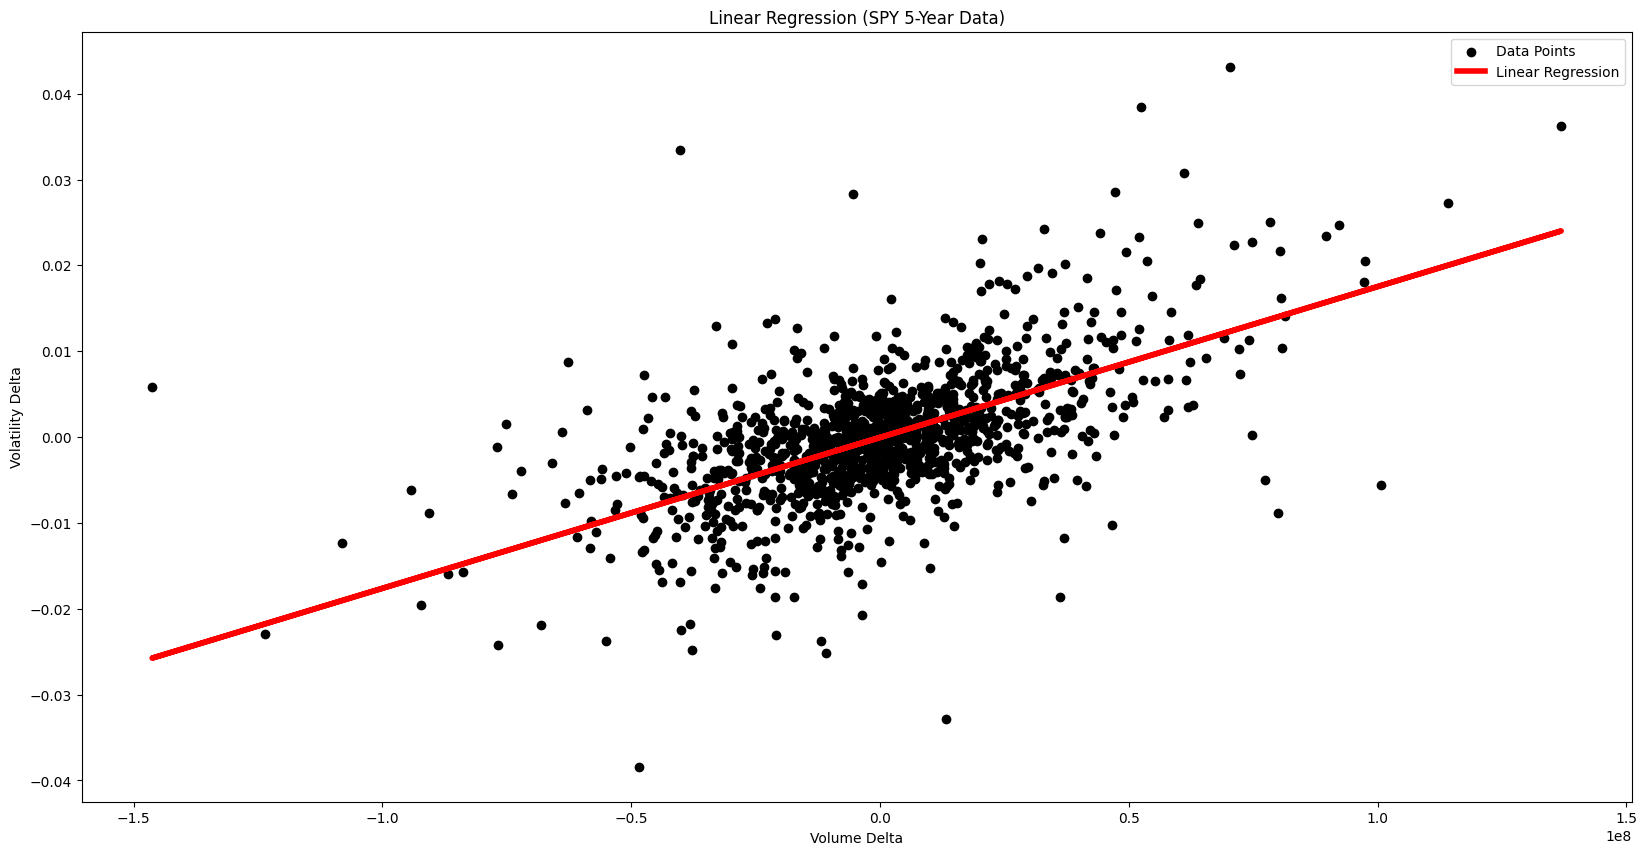

In [51]:
# SPY 5 year graph plot

x_test = np.array(spy5['Volume_delta']).reshape(-1, 1)
y_test = np.array(spy5['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept  # Use the polynomial model from the original data

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (SPY 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

# Conclusion 1



1 year of equation of SPY data is performing well with 5 years of data and giving insight of the trend for last 5 years in SPY.

## --------------------------- ETFS -----------------------------

# Step 2: Continue your research on other ETFs

<br/> You pick other ETFs and research the intraday volatility vs volume as Step 1. You can pick from the list
https://etfdb.com/compare/volume/ (https://etfdb.com/compare/volume/)
Do other ETFs fit your equation(s)? Better fit or worse fit? Please provide some explanation.


# Other ETFs list to research 

#### Model is trained on SQQQ 5 years of dataset

#### We used below ETFs 5 years dataset to fit the line
1. SQQQ
2. TQQQ
3. QQQ
4. PSQ
5. SOXL
6. SOXS


# SQQQ

RMSE: 0.028024
R-squared: 0.076767


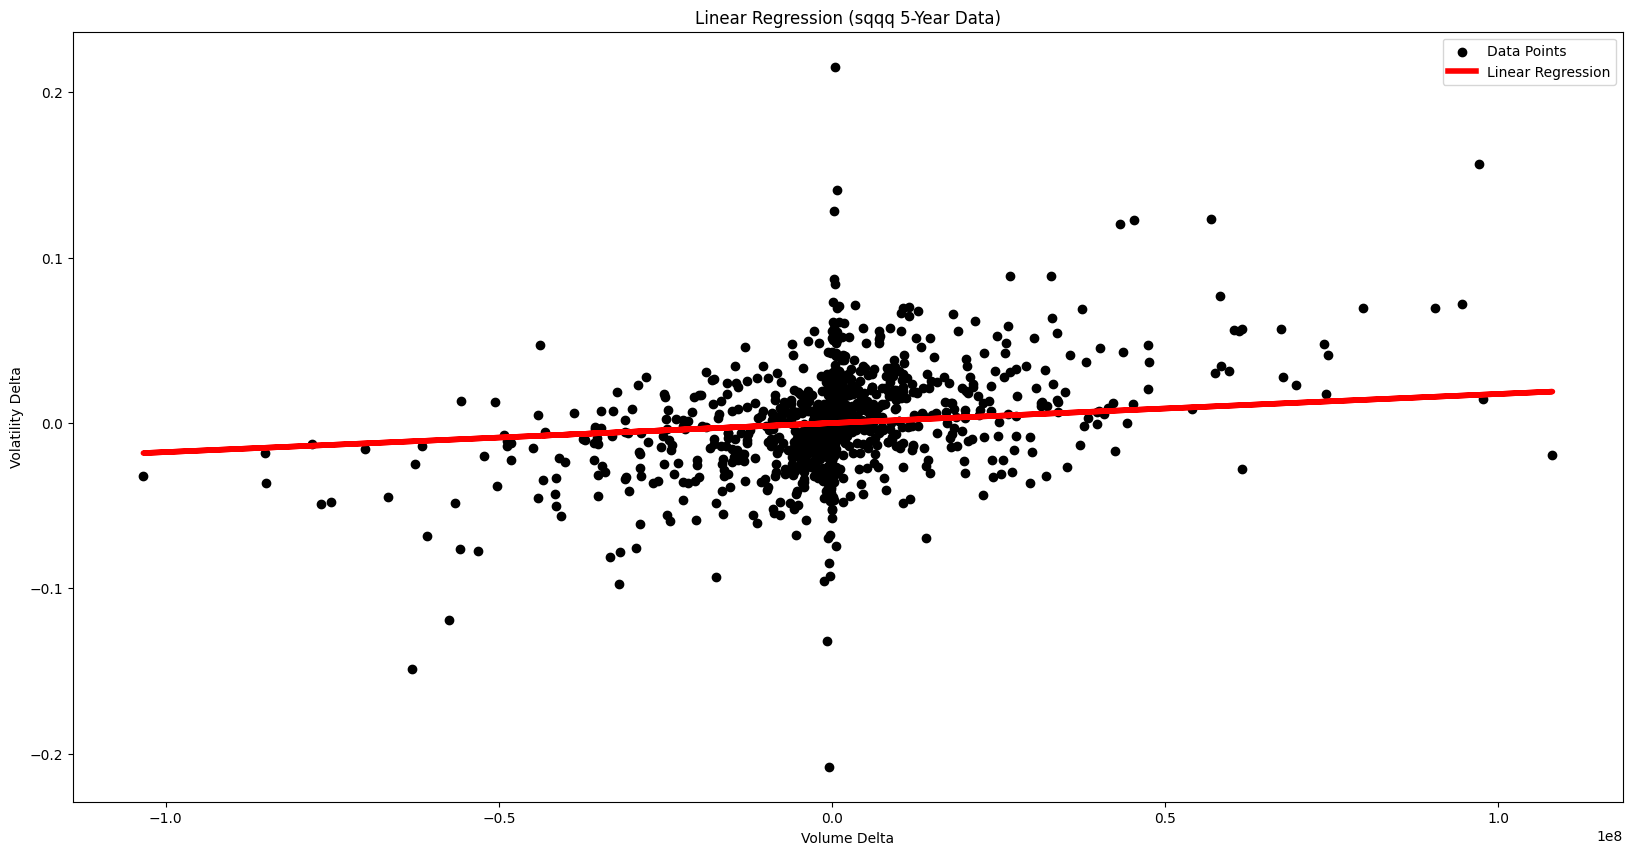

In [52]:
# Loading Data

sqqq = pd.read_csv('etfs/SQQQ.csv')

sqqq['Volatility'] = (sqqq['High'] - sqqq['Low'])/sqqq['Close']
sqqq['Volume_delta'] = sqqq['Volume'] - sqqq['Volume'].shift(1)
sqqq['Volatility_delta'] = sqqq['Volatility'] - sqqq['Volatility'].shift(1)

# Handling null values
sqqq = sqqq.fillna(0)

x_test = np.array(sqqq['Volume_delta']).reshape(-1, 1)
y_test = np.array(sqqq['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (sqqq 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

SQQQ Conclusion: RMSE value of 5 Years SQQQ shows good fit on SPY 1 Year of equation so it is a better fit.

# TQQQ

New RMSE: 0.025151
New R-squared: 0.216942


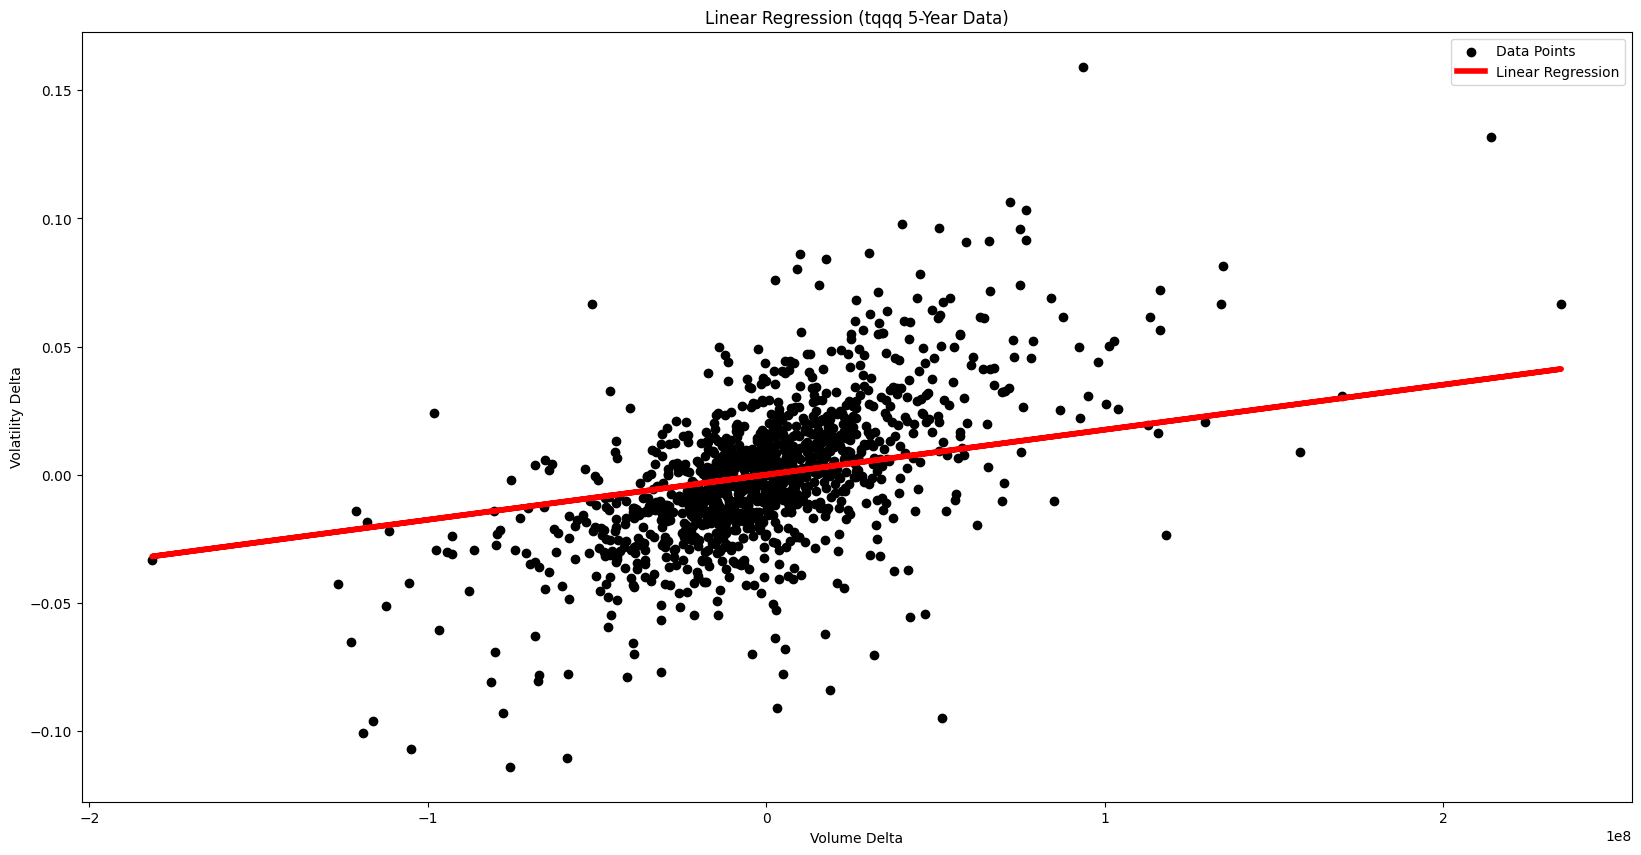

In [53]:
tqqq = pd.read_csv('etfs/TQQQ.csv')
tqqq.head()

tqqq['Volatility'] = (tqqq['High'] - tqqq['Low'])/tqqq['Close']
tqqq['Volume_delta'] = tqqq['Volume'] - tqqq['Volume'].shift(1)
tqqq['Volatility_delta'] = tqqq['Volatility'] - tqqq['Volatility'].shift(1)

# Handling null values
tqqq = tqqq.fillna(0)
tqqq.head()

x_test = np.array(tqqq['Volume_delta']).reshape(-1, 1)
y_test = np.array(tqqq['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept 

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"New RMSE: {rmse:.6f}")
print(f"New R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (tqqq 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

TQQQ Conclusion: As we fit the line for 5 years TQQQ data, we can see the vigorous pattern of data using SPY 1 year equation. Therefore, it is a good fit.

# QQQ

RMSE: 0.007752
R-squared: 0.272074


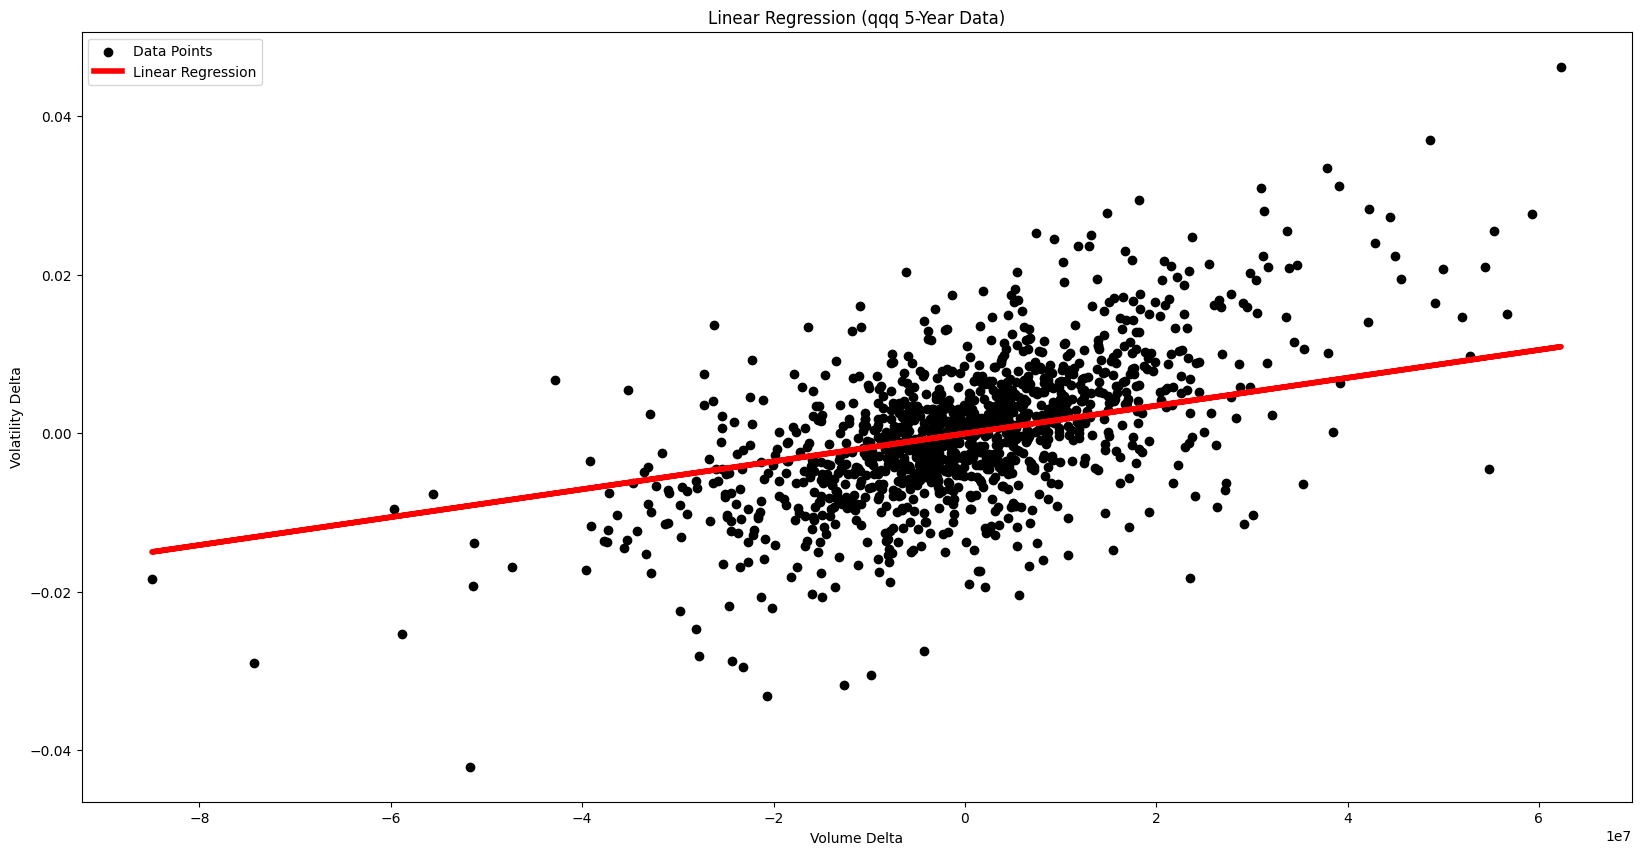

In [54]:
qqq = pd.read_csv('etfs/QQQ.csv')
qqq
qqq['Volatility'] = (qqq['High'] - qqq['Low'])/qqq['Close']
qqq['Volume_delta'] = qqq['Volume'] - qqq['Volume'].shift(1)
qqq['Volatility_delta'] = qqq['Volatility'] - qqq['Volatility'].shift(1)

# Handling null values
qqq = qqq.fillna(0)
qqq.head()

x_test = np.array(qqq['Volume_delta']).reshape(-1, 1)
y_test = np.array(qqq['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (qqq 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

QQQ Conclusion: We are getting good RMSE value for QQQ data and line fits perfectly on 5 years of QQQ data

# PSQ

New RMSE: 0.008962
New R-squared: 0.050005


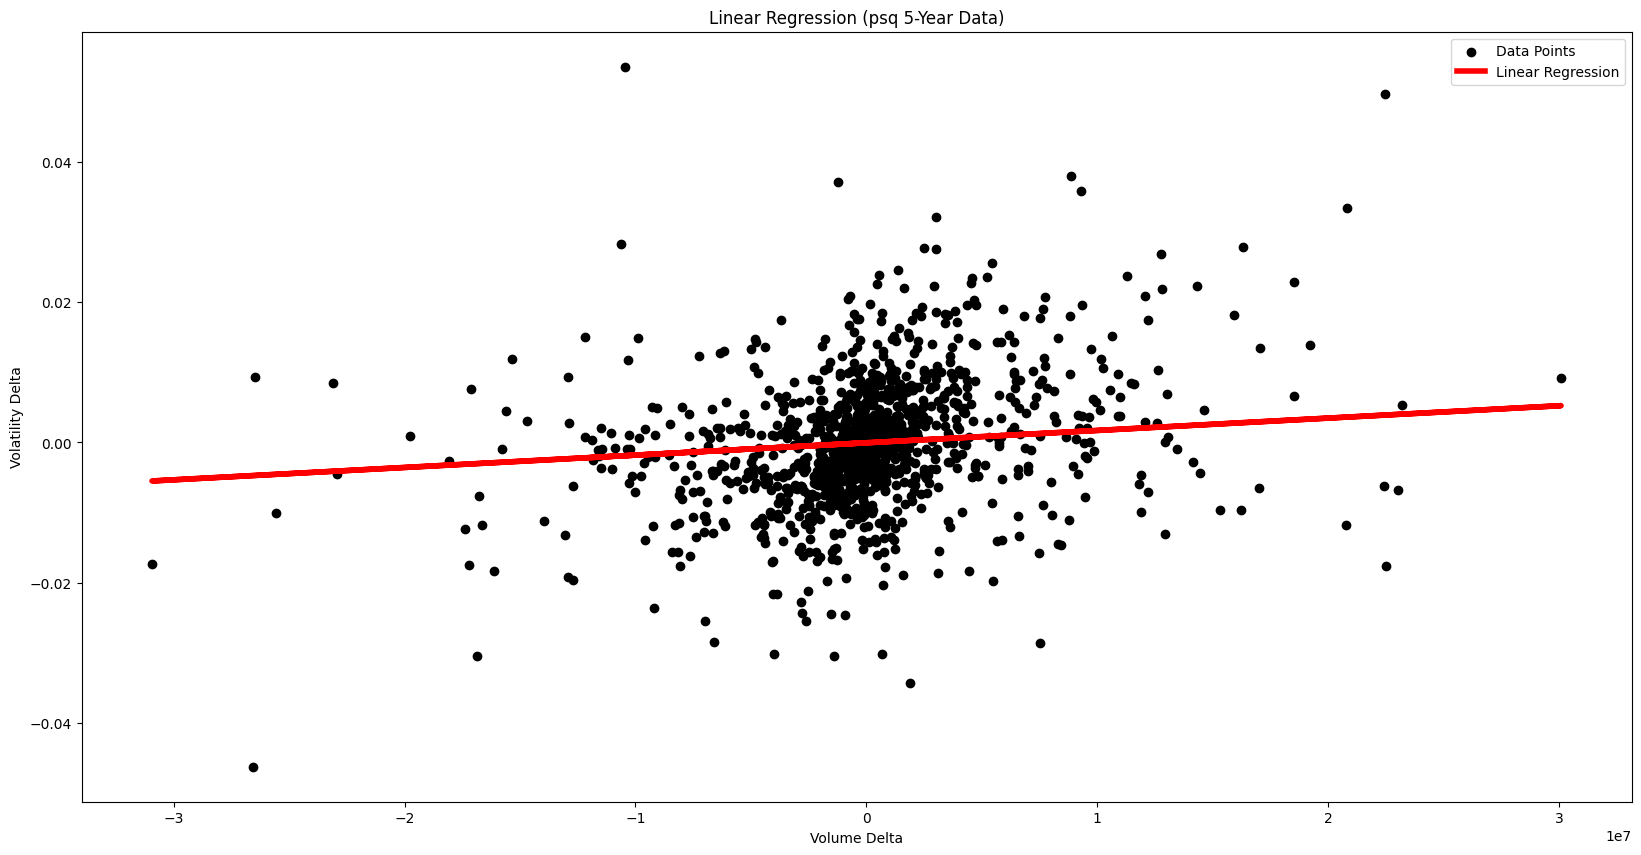

In [55]:
psq = pd.read_csv('etfs/PSQ.csv')
psq.head()

psq['Volatility'] = (psq['High'] - psq['Low'])/psq['Close']
psq['Volume_delta'] = psq['Volume'] - psq['Volume'].shift(1)
psq['Volatility_delta'] = psq['Volatility'] - psq['Volatility'].shift(1)

# Handling null values
psq = psq.fillna(0)
psq.head()

x_test = np.array(psq['Volume_delta']).reshape(-1, 1)
y_test = np.array(psq['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (psq 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

PSQ Conclusion: We are getting good RMSE value for PSQ data and line fits perfectly on 5 years of PSQ data

# SOXL

RMSE: 0.035633
R-squared: 0.070264


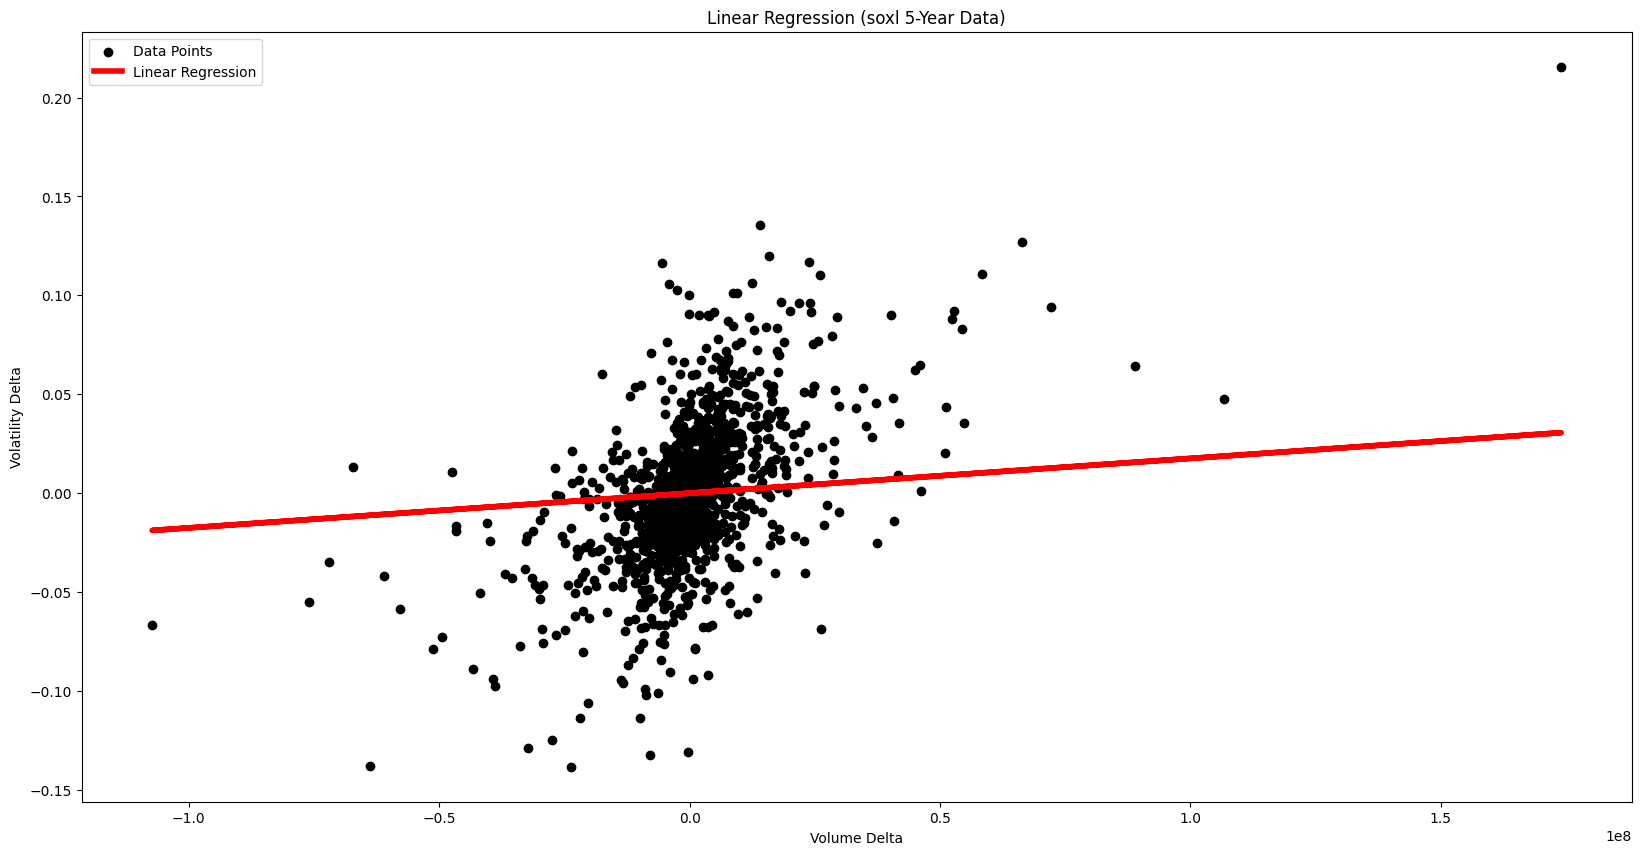

In [57]:
soxl = pd.read_csv('etfs/SOXL.csv')
soxl.head()

soxl['Volatility'] = (soxl['High'] - soxl['Low'])/soxl['Close']
soxl['Volume_delta'] = soxl['Volume'] - soxl['Volume'].shift(1)
soxl['Volatility_delta'] = soxl['Volatility'] - soxl['Volatility'].shift(1)

# Handling null values
soxl = soxl.fillna(0)

x_test = np.array(soxl['Volume_delta']).reshape(-1, 1)
y_test = np.array(soxl['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (soxl 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

SOXL Conclusion: Data points in this graph seems to be vigorous and used to be creating cluster at some area so it is not as good as other ETF's plot. Hence, Not a great fit

# SOXS

RMSE: 0.041727
R-squared: 0.016370


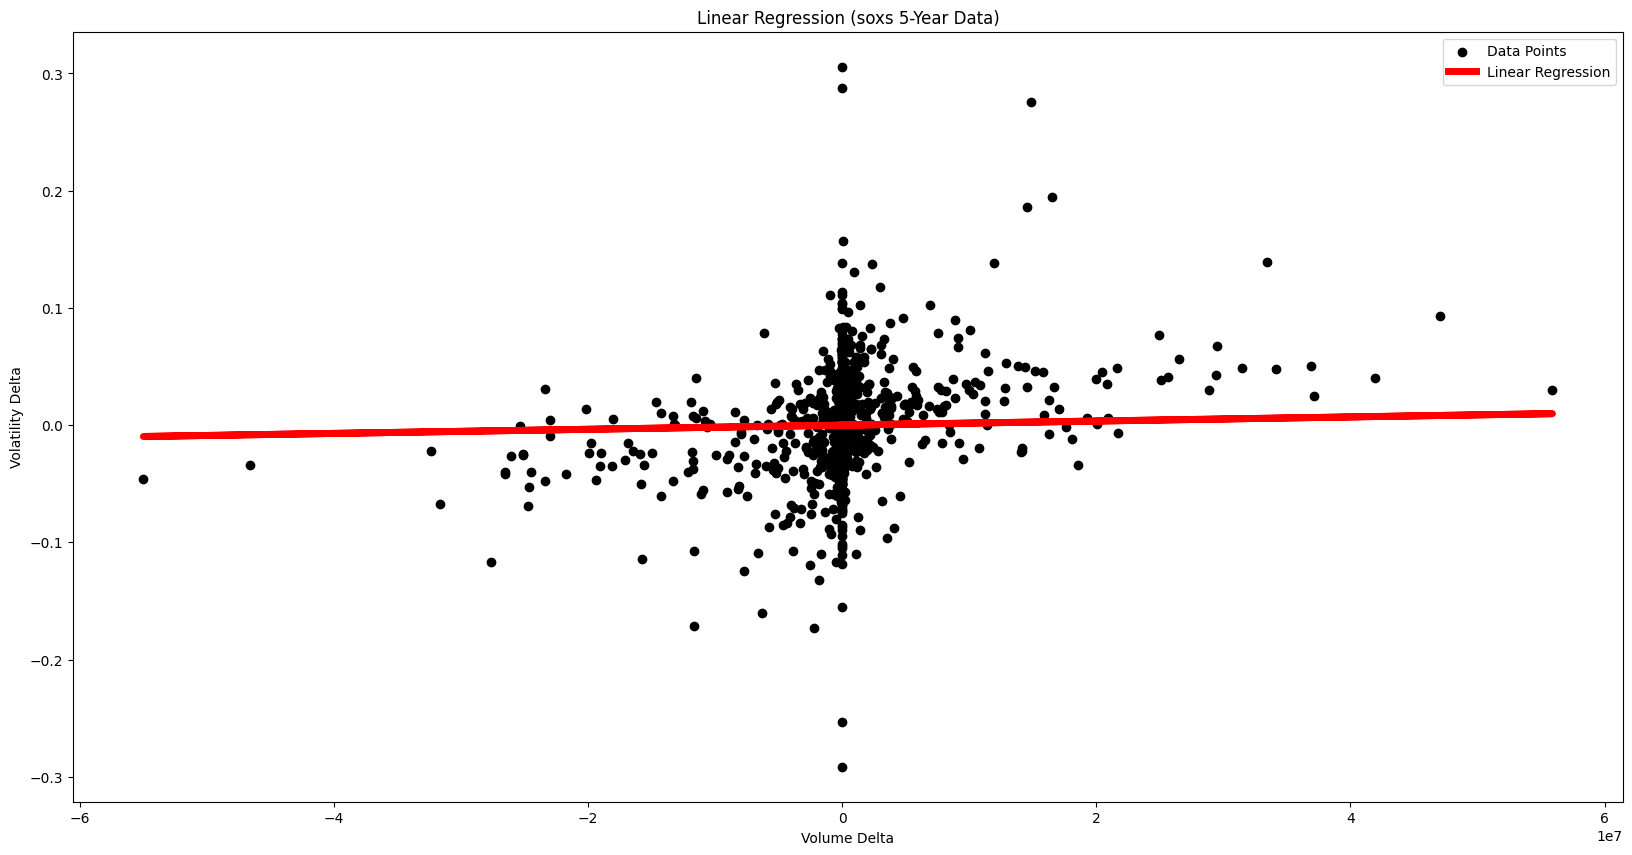

In [58]:
soxs = pd.read_csv('etfs/soxs.csv')
soxs.head()

soxs['Volatility'] = (soxs['High'] - soxs['Low'])/soxs['Close']
soxs['Volume_delta'] = soxs['Volume'] - soxs['Volume'].shift(1)
soxs['Volatility_delta'] = soxs['Volatility'] - soxs['Volatility'].shift(1)

# Handling null values
soxs = soxs.fillna(0)

x_test = np.array(soxs['Volume_delta']).reshape(-1, 1)
y_test = np.array(soxs['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=5)
plt.title('Linear Regression (soxs 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

SOXS Conclusion: Data points are revolving around the line that shows SOXS data is very well predicted with 1 SPY model. Therefore, it is a good fit.

# Conclusion 2 (ETFS)

After testing the SPY 1 year equation on the above ETFs, we can confidently infer that the equation is working very well with majority of ETFs data.


90% of ETFs data are fitting perfect line with the equation.


It seems to be BETTER FIT with the ETFs

## ------------------------------- STOCKS ---------------------------------

In [43]:
# Loading Data

amzn = pd.read_csv('stocks/AMZN.csv')
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,78.499496,81.195503,78.254501,79.900497,79.900497,187804000
1,2018-11-01,81.176498,83.522499,79.921997,83.276497,83.276497,162710000
2,2018-11-02,83.929497,84.872002,82.591499,83.276497,83.276497,139110000
3,2018-11-05,82.878502,82.904503,79.818001,81.389999,81.389999,112494000
4,2018-11-06,80.917503,83.250000,80.727501,82.140503,82.140503,85148000


In [44]:
# Adding required columns of 'Volatility', 'Volume_delta', 'Volatility_delta'

amzn['Volatility'] = (amzn['High'] - amzn['Low'])/amzn['Close']
amzn['Volume_delta'] = amzn['Volume'] - amzn['Volume'].shift(1)
amzn['Volatility_delta'] = amzn['Volatility'] - amzn['Volatility'].shift(1)
# Handling null values
amzn = amzn.fillna(0)
amzn

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
0,2018-10-31,78.499496,81.195503,78.254501,79.900497,79.900497,187804000,0.036808,0.0,0.000000
1,2018-11-01,81.176498,83.522499,79.921997,83.276497,83.276497,162710000,0.043236,-25094000.0,0.006427
2,2018-11-02,83.929497,84.872002,82.591499,83.276497,83.276497,139110000,0.027385,-23600000.0,-0.015851
3,2018-11-05,82.878502,82.904503,79.818001,81.389999,81.389999,112494000,0.037922,-26616000.0,0.010538
4,2018-11-06,80.917503,83.250000,80.727501,82.140503,82.140503,85148000,0.030710,-27346000.0,-0.007213
...,...,...,...,...,...,...,...,...,...,...
1252,2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400,0.019135,-1782600.0,-0.011680
1253,2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500,0.045720,28100100.0,0.026585
1254,2023-10-26,120.629997,121.639999,118.349998,119.570000,119.570000,100419500,0.027515,25842000.0,-0.018205
1255,2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125204500,0.035228,24785000.0,0.007713


<Axes: xlabel='Volume_delta'>

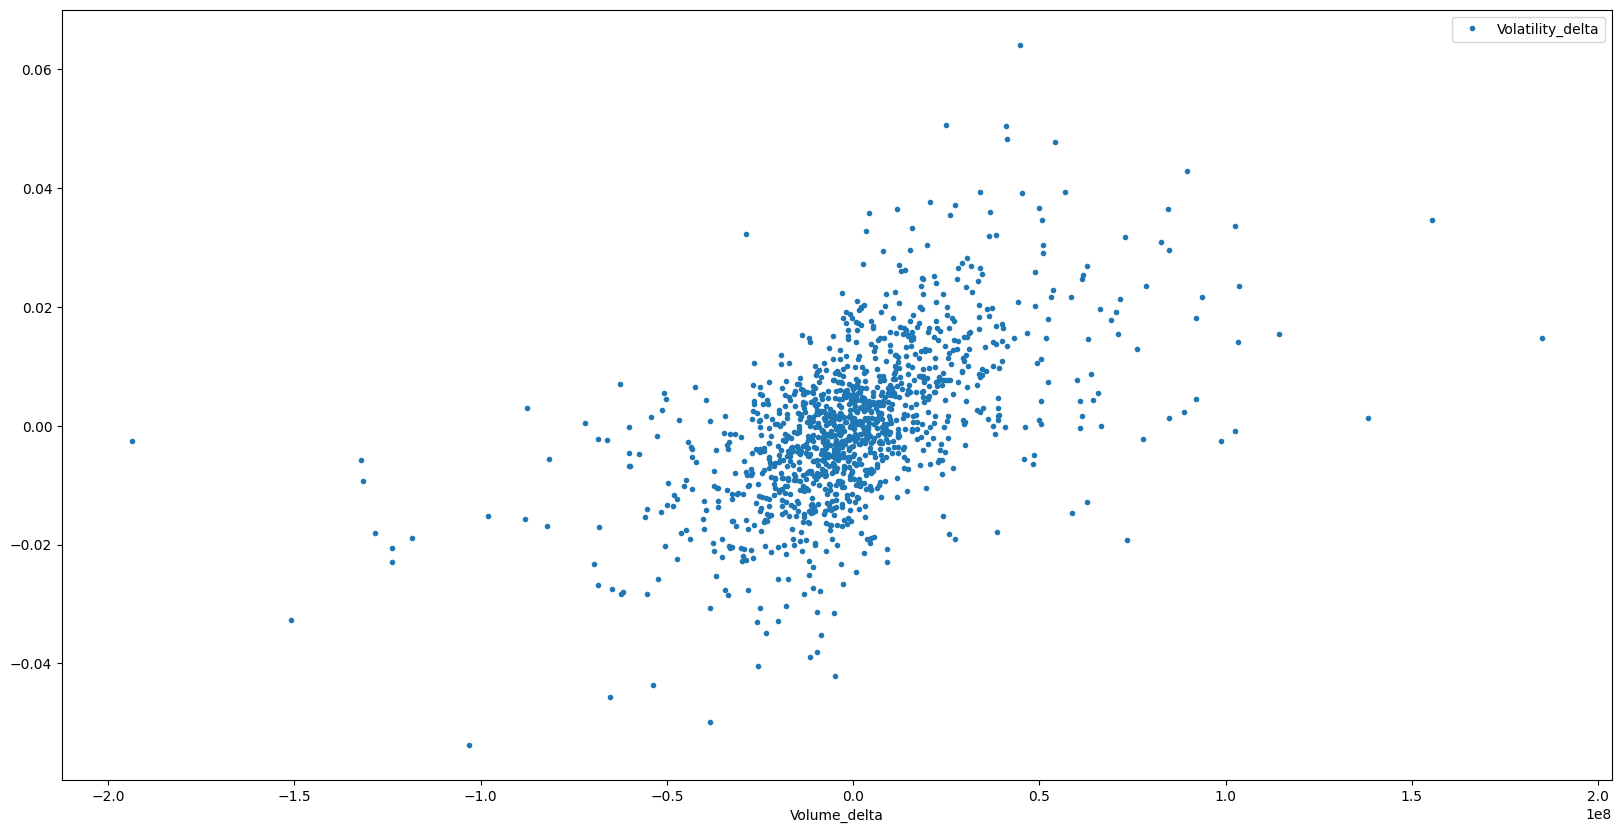

In [45]:
amzn.plot(x = 'Volume_delta', y= 'Volatility_delta', style='.')

RMSE: 0.011119
R-squared: 0.275130


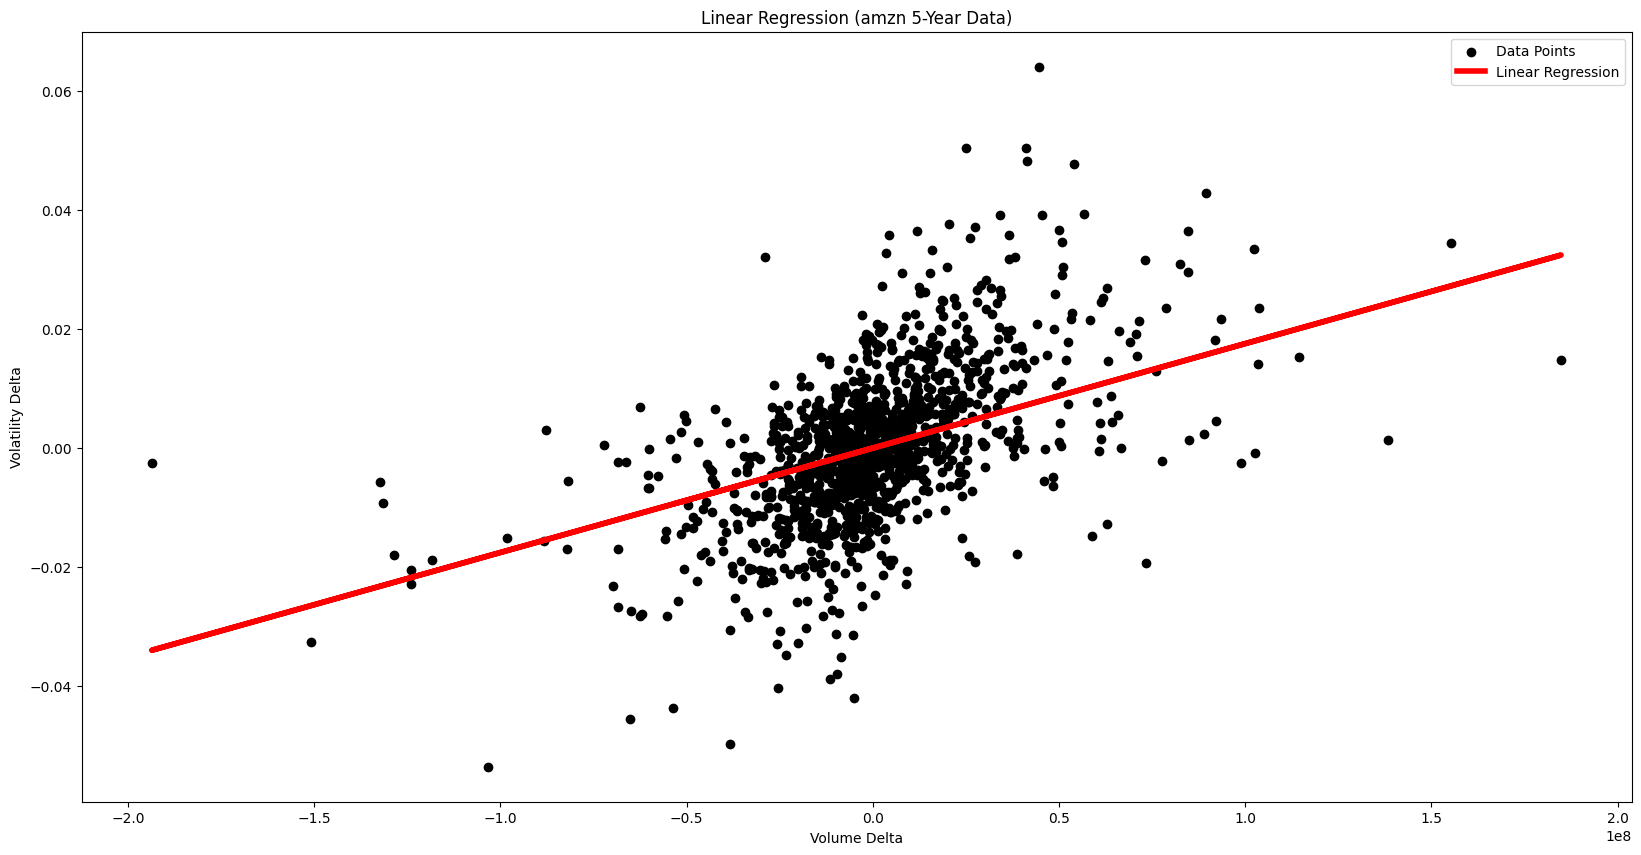

In [59]:
x_test = np.array(amzn['Volume_delta']).reshape(-1, 1)
y_test = np.array(amzn['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (amzn 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

AMZN data stocks are working well with the equation

RMSE: 0.009397
R-squared: 0.048674


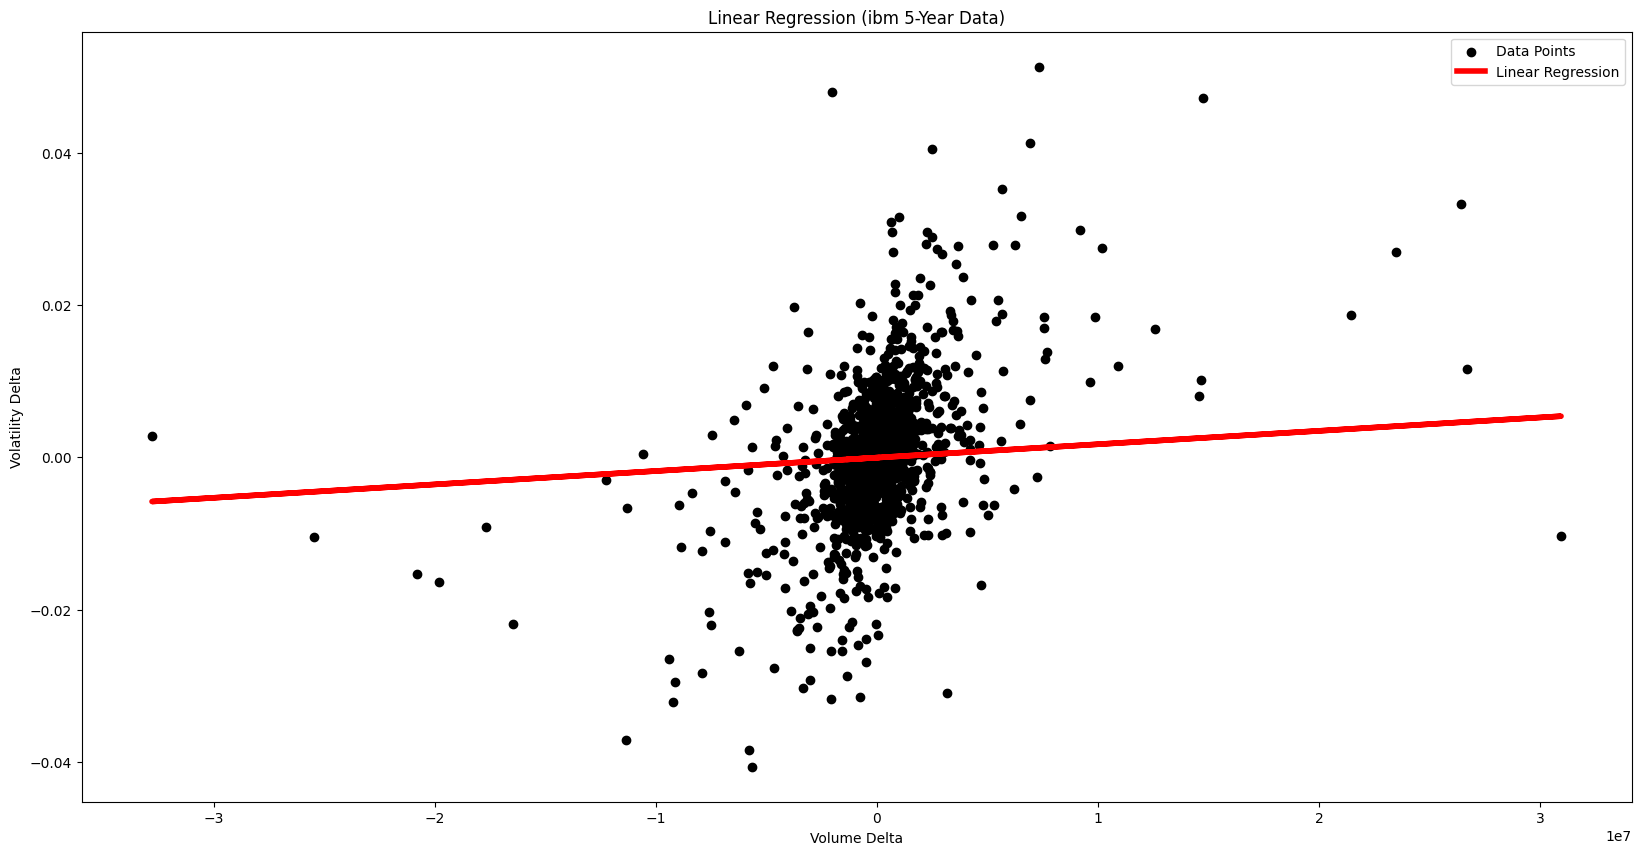

In [36]:
ibm = pd.read_csv('stocks/IBM.csv')
ibm.head()

ibm['Volatility'] = (ibm['High'] - ibm['Low'])/ibm['Close']
ibm['Volume_delta'] = ibm['Volume'] - ibm['Volume'].shift(1)
ibm['Volatility_delta'] = ibm['Volatility'] - ibm['Volatility'].shift(1)
# Handling null values
ibm = ibm.fillna(0)

# Creating numpy variables to create the model

x_test = np.array(ibm['Volume_delta']).reshape(-1, 1)
y_test = np.array(ibm['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (ibm 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

IBM data stocks are not working well with the equation so its a worst fit

RMSE: 0.010461
R-squared: 0.135490


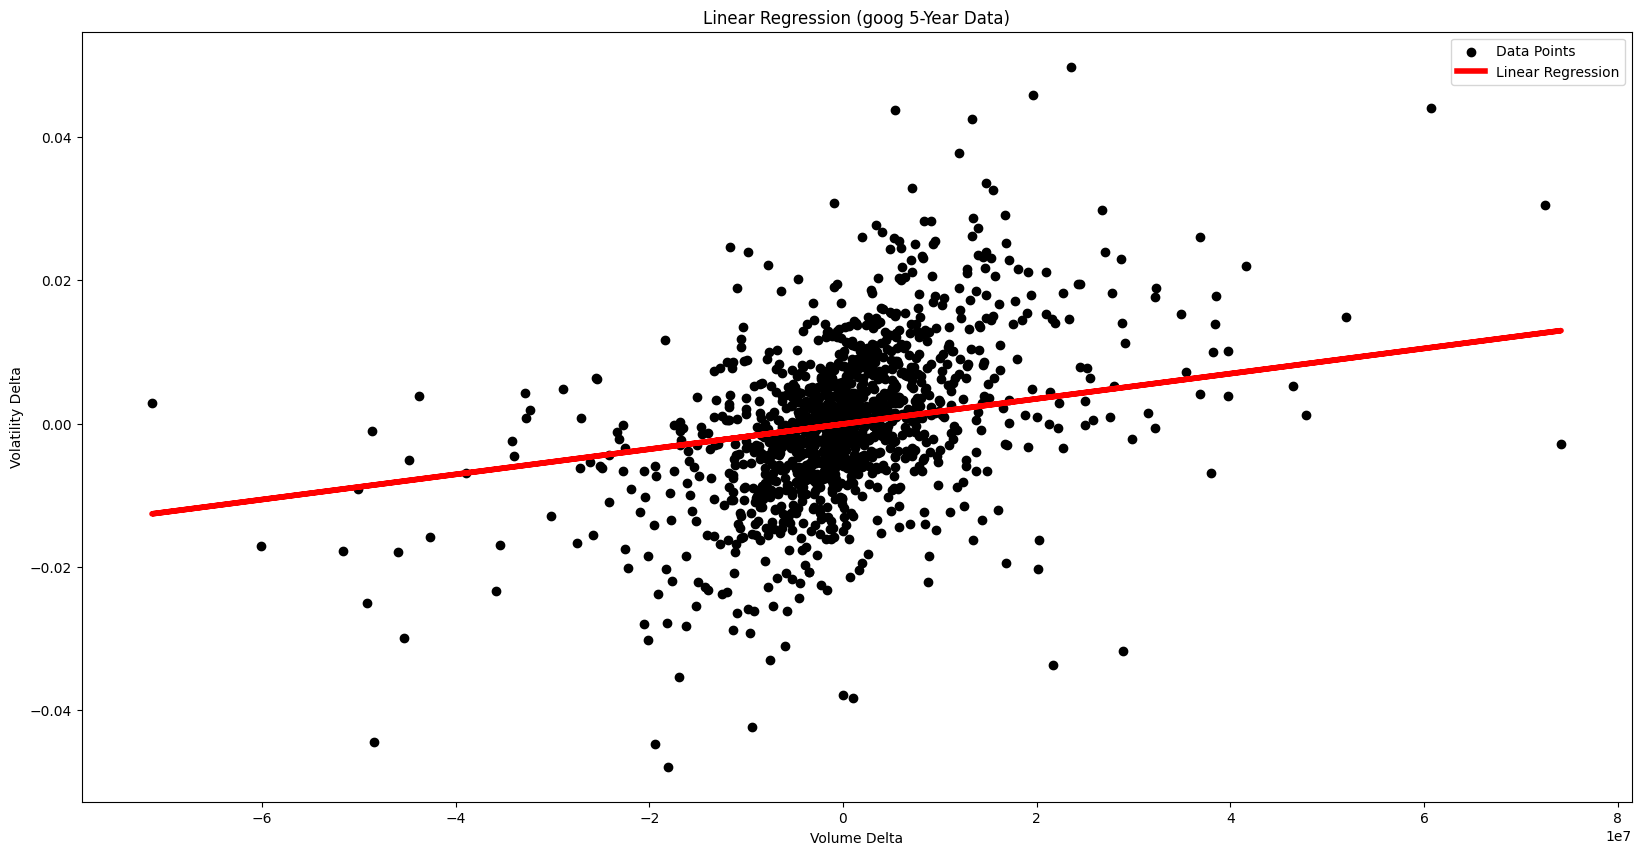

In [37]:
goog = pd.read_csv('stocks/GOOG.csv')
goog.head()
goog['Volatility'] = (goog['High'] - goog['Low'])/goog['Close']
goog['Volume_delta'] = goog['Volume'] - goog['Volume'].shift(1)
goog['Volatility_delta'] = goog['Volatility'] - goog['Volatility'].shift(1)
# Handling null values
goog = goog.fillna(0)
goog

# Creating numpy variables to create the model

x_test = np.array(goog['Volume_delta']).reshape(-1, 1)
y_test = np.array(goog['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (goog 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

Goog data stocks are working well with the equation so its a better fit

RMSE: 0.013602
R-squared: 0.121533


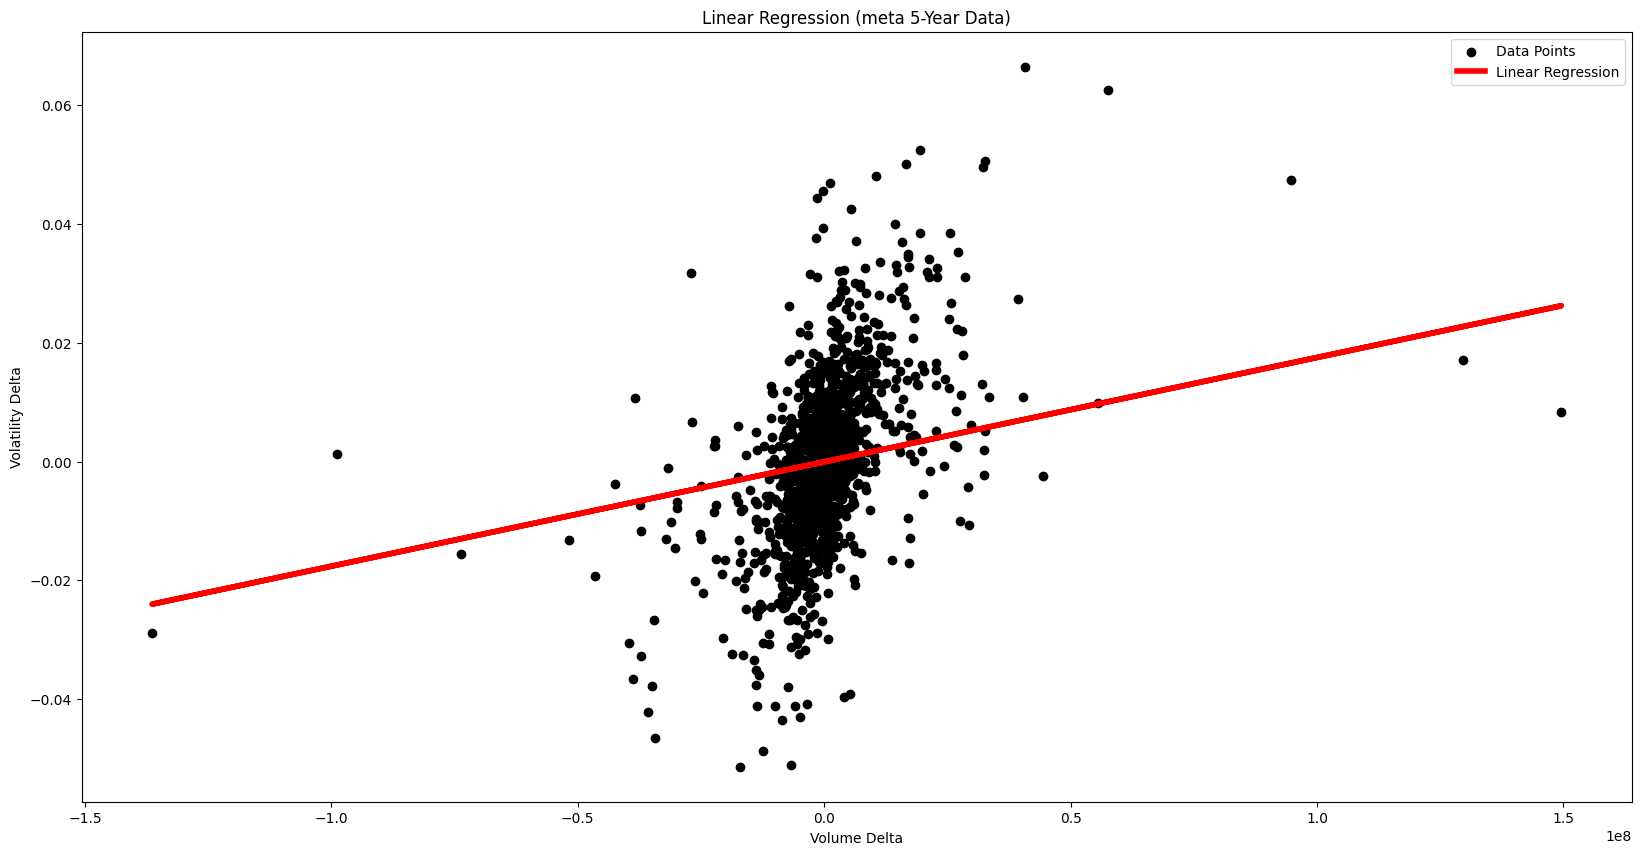

In [41]:
meta = pd.read_csv('stocks/META.csv')
meta.head()
meta['Volatility'] = (meta['High'] - meta['Low'])/meta['Close']
meta['Volume_delta'] = meta['Volume'] - meta['Volume'].shift(1)
meta['Volatility_delta'] = meta['Volatility'] - meta['Volatility'].shift(1)
# Handling null values
meta = meta.fillna(0)
meta

# Creating numpy variables to create the model

x_test = np.array(meta['Volume_delta']).reshape(-1, 1)
y_test = np.array(meta['Volatility_delta']).reshape(-1, 1)
y_test_pred = slope * x_test + intercept

# Calculate RMSE and R-squared for the new predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.scatter(x_test, y_test, label='Data Points', color='black')
plt.plot(x_test, y_test_pred, label='Linear Regression', color='r', linewidth=4)
plt.title('Linear Regression (meta 5-Year Data)')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.show()

META data stocks are not working well with the equation so its a worst fit

# Conclusion 3 (Stocks)

When we predict and test the equation of SPY in above stocks i.e. IBM, GOOG, META, AMZN, we can analyze that equation is not working well with all the stocks data. 

Equation is working well with only few particular stocks like goog and amzn

According to the result, the performance of our equation is providing WORST FIT for the stocks